Project - Wine quality Analysis
Name - Santosh Pandeya
Email - santosh01p@gmail.com

In [71]:
#import needed libraries & float format definition

import unicodecsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

pd.options.display.float_format = '{:.0f}'.format

In [86]:
data = pd.read_csv('D:/Python/Project/Project_Datasets/attachment_Project_3_Wine_Quality_data/Project_3_Wine_Quality_data/winequality.csv')
data.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


Lets reload the dataset by assigning the data separator explicitly to read_csv().

In [73]:
wine = pd.read_csv('D:/Python/Project/Project_Datasets/attachment_Project_3_Wine_Quality_data/Project_3_Wine_Quality_data/winequality.csv', sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7,1,0,2,0,11,34,1,4,1,9,5
1,8,1,0,3,0,25,67,1,3,1,10,5
2,8,1,0,2,0,15,54,1,3,1,10,5
3,11,0,1,2,0,17,60,1,3,1,10,6
4,7,1,0,2,0,11,34,1,4,1,9,5


Exploring the Red Wine dataset:

In [74]:
# Now, let's check the information about different variables/column from the dataset:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We can see that, all 12 columns are of numeric data types. Out of 12 variables, 11 are predictor variables and last one 'quality' is an response variable.

In [75]:
# Let's look at the summary of the dataset,
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599
mean,8,1,0,3,0,16,46,1,3,1,10,6
std,2,0,0,1,0,10,33,0,0,0,1,1
min,5,0,0,1,0,1,6,1,3,0,8,3
25%,7,0,0,2,0,7,22,1,3,1,10,5
50%,8,1,0,2,0,14,38,1,3,1,10,6
75%,9,1,0,3,0,21,62,1,3,1,11,6
max,16,2,1,16,1,72,289,1,4,2,15,8


The summary of Red Wine dataset looks perfect, there is no visible abnormality in data (invalid/negative values).
All the data seems to be in range (with different scales, which needs standardization).

Finding missing values in red wine dataset:

In [76]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The red wine dataset doesn't have any missing values/rows/cells for any of the variables/feature.

Modifing the dataset headers/column names by removing the 'blank spaces' from it.

In [77]:
wine.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7,1,0,2,0,11,34,1,4,1,9,5
1,8,1,0,3,0,25,67,1,3,1,10,5
2,8,1,0,2,0,15,54,1,3,1,10,5
3,11,0,1,2,0,17,60,1,3,1,10,6
4,7,1,0,2,0,11,34,1,4,1,9,5


Check how many unique values does the target feature 'quality' has?

In [78]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

And how data is distributed among those values?

In [79]:
wine.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

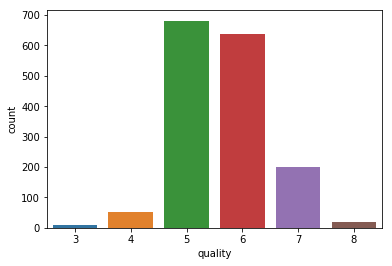

In [80]:
sns.countplot(x='quality', data=wine)

The above distribution shows the range for response variable (quality) is between 3 to 8.

Creating a new discreet, categorical response variable/feature ('rating') from existing 'quality' variable.
Example bad: 1-4
      average: 5-6
      good: 7-10

In [81]:
quality_conditions = [
    (wine['quality'] >= 7),
    (wine['quality'] <= 4)
]
rating = ['good', 'bad']
wine['rating'] = np.select(quality_conditions, rating, default='average')
wine.rating.value_counts()

average    1319
good        217
bad          63
Name: rating, dtype: int64

In [82]:
wine.groupby('rating').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
average,8,1,0,3,0,16,49,1,3,1,10,5
bad,8,1,0,3,0,12,34,1,3,1,10,4
good,9,0,0,3,0,14,35,1,3,1,12,7


Corelation between the target variable and predictor variables,

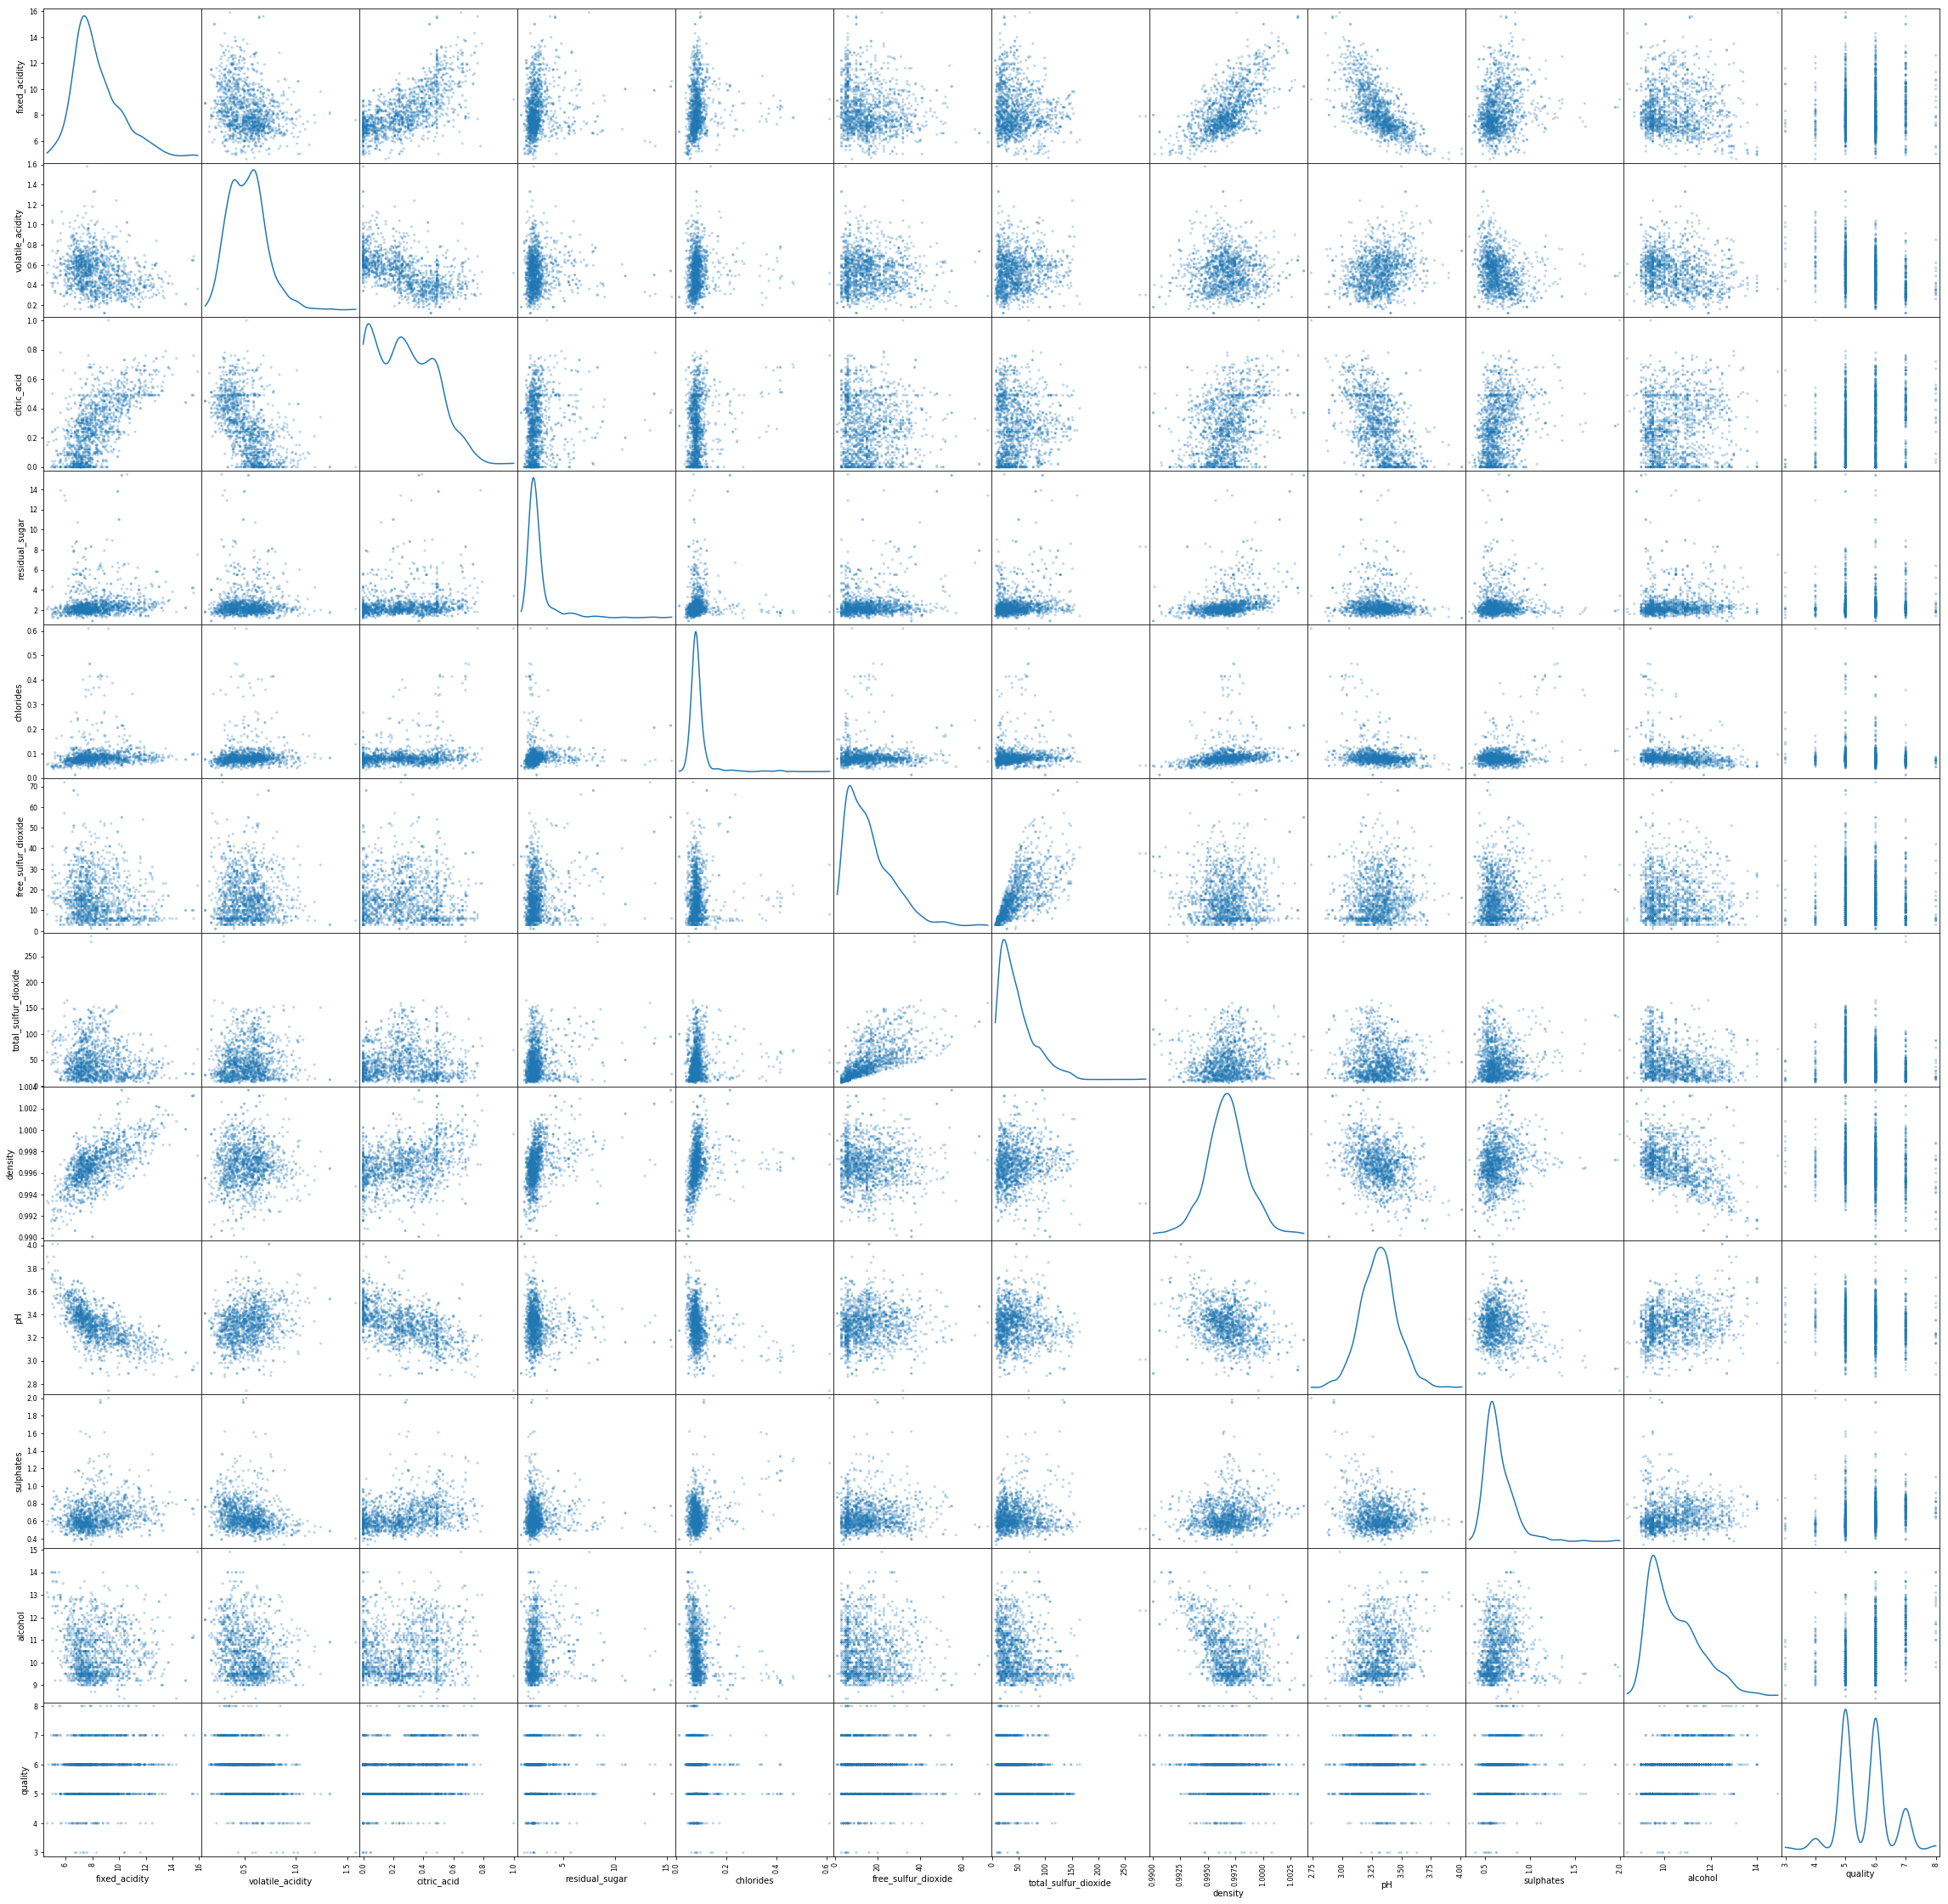

In [51]:
pd.plotting.scatter_matrix(wine, alpha = 0.3, figsize = (40,40), diagonal = 'kde');


From the above scatterplot we can get some good details. For some of the features, the distribution appears to be fairly linear. For some others, the distribution appears to be negatively skewed. So this confirms that there are some interesting co-dependencies between some of the features.

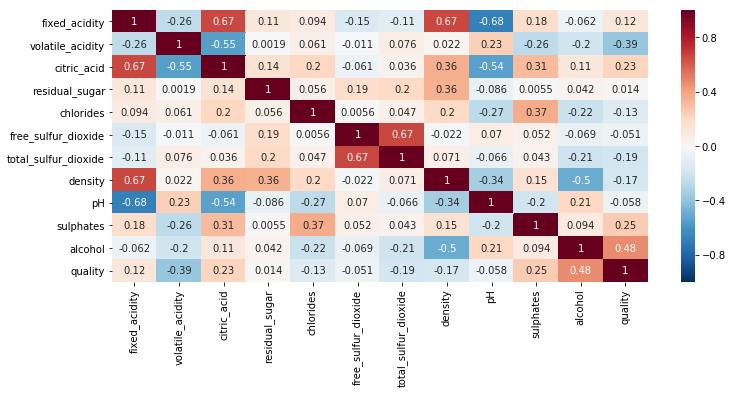

In [83]:
correlation = wine.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

As I can see, the squares with positive values show direct co-relationships between features. The higher the values, the stronger these relationships are. That means, if one feature increases, the other one also tends to increase, and vice-versa. Squares close to zero indicate almost no co-dependency between those sets of features.

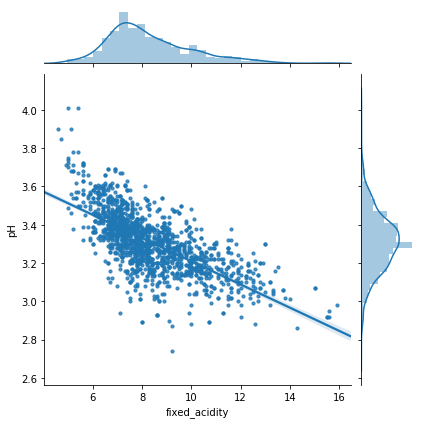

In [84]:
#pH vs. Fixed Acidity
#new dataframe containing only pH and fixed acidity columns to visualize their co-relations
fixedAcidity_pH = wine[['pH', 'fixed_acidity']]
#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="fixed_acidity", y="pH", data=fixedAcidity_pH, size=6)
#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})
#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

This scatter-plot shows how the values of pH change with changing fixed acidity levels. I can see that, as fixed acidity levels increase, the pH levels drop. Makes sense to understand a lower pH level indicates of high acidity.

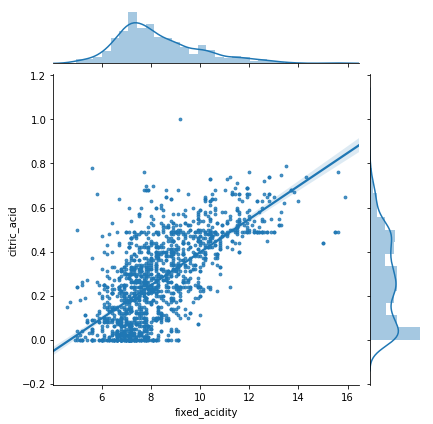

In [88]:
#Fixed Acidity vs. Citric Acid

fixedAcidity_citricAcid = wine[['citric_acid', 'fixed_acidity']]
g = sns.JointGrid(x="fixed_acidity", y="citric_acid", data=fixedAcidity_citricAcid, size=6)
g = g.plot_joint(sns.regplot, scatter_kws={"s": 8})
g = g.plot_marginals(sns.distplot)

I can see in above graph that fixed acidity increases ctric acid drops. That makes sence to understand that citric acid is preservative. So it should be in considrable amount in wine.

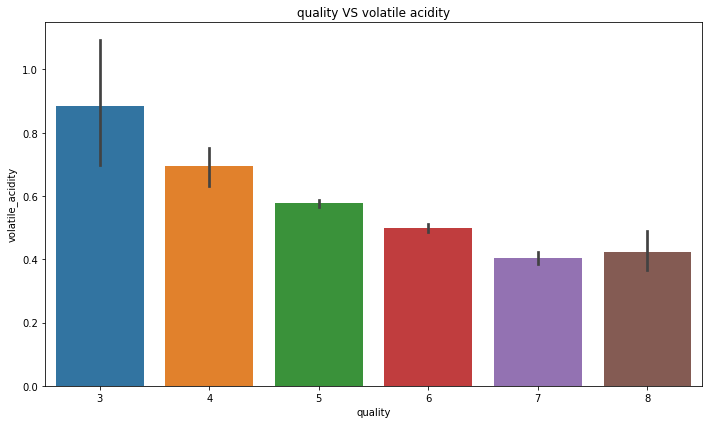

In [67]:
#Volatile Acidity vs Quality
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='volatile_acidity', data=wine, ax=axs)
plt.title('quality VS volatile acidity')
plt.tight_layout()
plt.show()
plt.gcf().clear()

A higher quality is usually associated with low volatile acidity levels. This makes sense, because volatile acidity is an indicator of spoilage and could give rise to unpleasant aromas

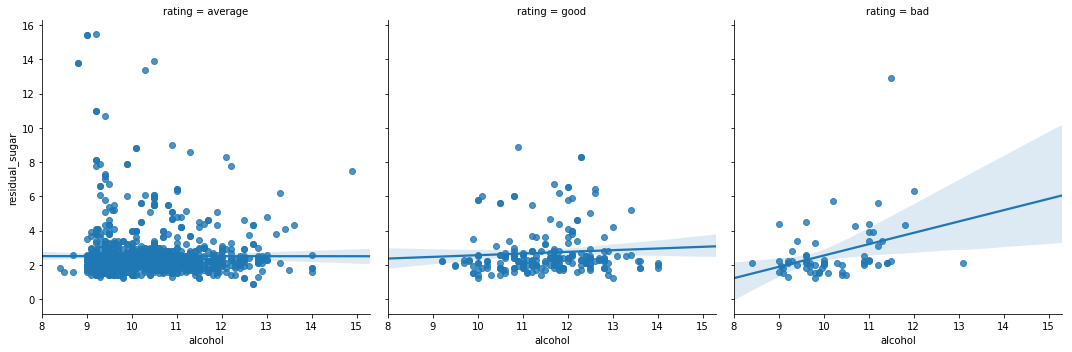

In [93]:
#Analysis of Residual sugar with wine quality:
sns.lmplot(x = "alcohol", y = "residual_sugar", col = "rating", data = wine)


I can observe from the trendline that, for good and average wine types the residual sugar content remains almost constant irrespective of alcohol content value. Whereas for bad quality wine, the residual sugar content increases gradually with the increase in alcohol content. So for manufacturing unit continuous monitoring and contrilling the alcohol and residual sugar content help to increase quality.

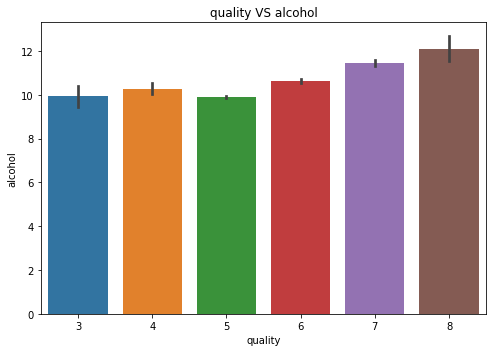

In [96]:
#Analysis of alcohol percentage with wine quality:
fig, axs = plt.subplots(ncols=1,figsize=(7,5))
sns.barplot(x='quality', y='alcohol', data=wine, ax=axs)
plt.title('quality VS alcohol')
plt.tight_layout()
plt.show()
plt.gcf().clear()

Looks like wine with higher alcohol having good quality:)

[Text(0,0.5,'pH'),
 Text(0.5,0,'Wine Ratings'),
 Text(0.5,1,'pH in different types of Wine ratings')]

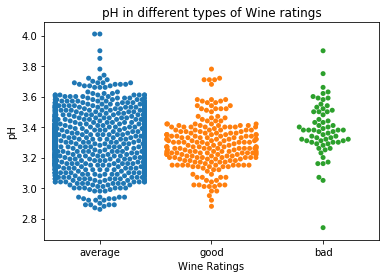

In [94]:
#Analysis of pH & wine ratings:
bx = sns.swarmplot(x="rating", y="pH", data = wine);
bx.set(xlabel='Wine Ratings', ylabel='pH', title='pH in different types of Wine ratings')

As we can see quality remains same for the above pH value.

[Text(0,0.5,'Citric Acid'),
 Text(0.5,0,'Wine Ratings'),
 Text(0.5,1,'Xitric_acid in different types of Wine ratings')]

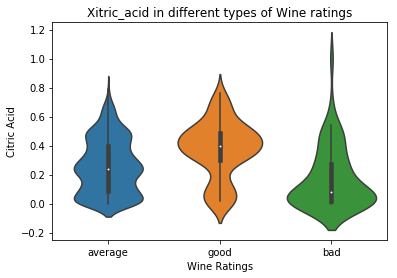

In [46]:
#Analysis of Citric Acid & wine ratings:
bx = sns.violinplot(x="rating", y='citric_acid', data = wine)
bx.set(xlabel='Wine Ratings', ylabel='Citric Acid', title='Xitric_acid in different types of Wine ratings')

[Text(0,0.5,'Sulphates'),
 Text(0.5,0,'Wine Ratings'),
 Text(0.5,1,'Sulphates in different types of Wine ratings')]

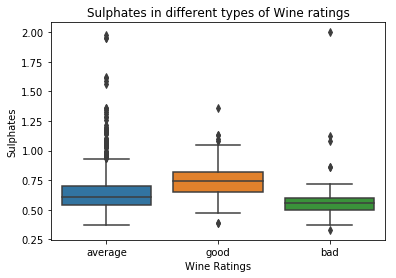

In [97]:
#Analysis of sulphates & wine ratings
bx = sns.boxplot(x="rating", y='sulphates', data = wine)
bx.set(xlabel='Wine Ratings', ylabel='Sulphates', title='Sulphates in different types of Wine ratings')

We can see here good quality are upper quartile and lower quartile 15% from the middle quatile 0.75

[Text(0,0.5,'Density'),
 Text(0.5,0,'Wine Ratings'),
 Text(0.5,1,'Density in different types of Wine ratings')]

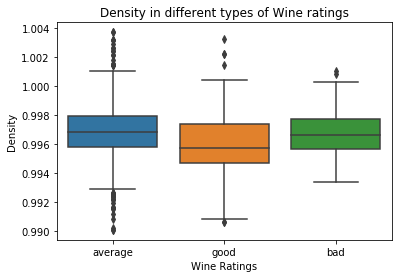

In [98]:
#Analysis of density & wine ratings
bx = sns.boxplot(x="rating", y='density', data = wine)
bx.set(xlabel='Wine Ratings', ylabel='Density', title='Density in different types of Wine ratings')

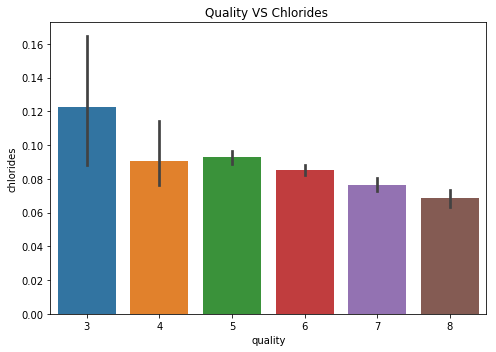

In [99]:
#Analysis of chlorides with wine quality:
fig, axs = plt.subplots(ncols=1,figsize=(7,5))
sns.barplot(x='quality', y='chlorides', data=wine, ax=axs)
plt.title('Quality VS Chlorides ')
plt.tight_layout()
plt.show()
plt.gcf().clear()

I can see that quality increases when Chlorides % is less. 